In [1]:
#import modules
import argparse
import os
import random
import numpy as np
import dataset
import modules
import train


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from glob import glob

from PIL import Image
import dataset
import modules
import utils
import predict

# Device
CUDA_DEVICE_NUM = 0
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)
print(torch.cuda.is_available())

# Hyperparameters
LEARNING_RATE = 0.0001
ROOTLOC = "\ISIC"
TRAINDATA = "ISIC\ISIC-2017_Training_Data\ISIC-2017_Training_Data"
TESTDATA = "ISIC\ISIC-2017_Test_v2_Data\ISIC-2017_Test_v2_Data"
VALIDDATA = "ISIC\ISIC-2017_Validation_Data\ISIC-2017_Validation_Data"
TRAINTRUTH = "ISIC\ISIC-2017_Training_Part1_GroundTruth\ISIC-2017_Training_Part1_GroundTruth"
TESTTRUTH = "ISIC\ISIC-2017_Test_v2_Part1_GroundTruth\ISIC-2017_Test_v2_Part1_GroundTruth"
VALIDTRUTH = "ISIC\ISIC-2017_Validation_Part1_GroundTruth\ISIC-2017_Validation_Part1_GroundTruth"

NUM_EPOCHS = 5
BATCH_SIZE = 1
WORKERS = 4


Device: cuda:0
True


In [2]:

train_dataset = dataset.CustomDataset(image_dir = TRAINDATA,
                                mask_dir=TRAINTRUTH,
                                transform=transforms.Compose([
                                transforms.ToTensor()]))
'''
transforms.Compose([
transforms.ToTensor(),
transforms.RandomRotation(30),
transforms.RandomResizedCrop(224),
transforms.RandomHorizontalFlip()])
'''


train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)

valid_dataset = dataset.CustomDataset(image_dir = VALIDDATA,
                                mask_dir=VALIDTRUTH,
                                transform=transforms.Compose([
                                    transforms.ToTensor()]))


'''
transforms.RandomRotation(30),
transforms.RandomResizedCrop(224),
transforms.RandomHorizontalFlip()
'''
                                
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)
'''

test_dataset = dataset.CustomDataset(image_dir = TESTDATA,
                                     mask_dir=TESTTRUTH,
                                    transform=transforms.Compose([
                                    transforms.ToTensor()]))
'''
'''
transforms.Compose([
transforms.ToTensor(),
transforms.RandomRotation(30),
transforms.RandomResizedCrop(224),
transforms.RandomHorizontalFlip()])
'''
'''
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,
                                         shuffle=True)
'''


print(enumerate(train_dataloader))
print(len(train_dataloader))
#print(len(test_dataloader))
print(len(train_dataset))
#print(len(test_dataset))






2000
2000


image: (3, 224, 224)
mask: (1, 224, 224)


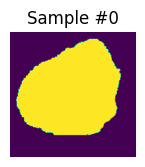

image: (3, 224, 224)
mask: (1, 224, 224)


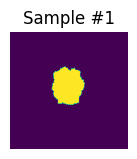

image: (3, 224, 224)
mask: (1, 224, 224)


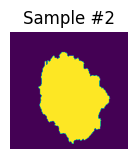

image: (3, 224, 224)
mask: (1, 224, 224)


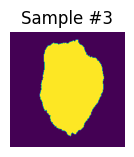

In [3]:

for i, sample in enumerate(train_dataset):
    #print(sample)
    image = sample['image']
    mask = sample['mask']

    #print(i, sample['image'].shape, sample['mask'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    #image = image.numpy()
    image = np.array(image)
    mask = np.array(mask)
    print("image:", image.shape)
    print("mask:", mask.shape)
    #print(type(image))
    image = np.transpose(image, (1, 2, 0))
    mask = np.transpose(mask, (1, 2, 0))

    plt.imshow(image)
    plt.imshow(mask)

    plt.show()
    if i == 3:
        plt.show()
        break

TRAIN 

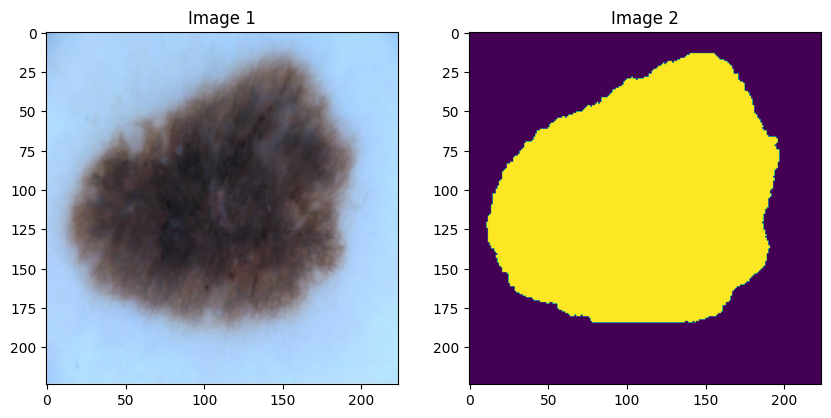

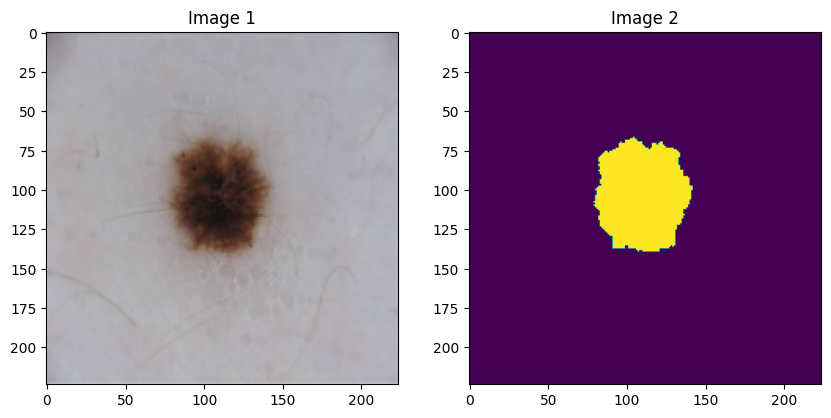

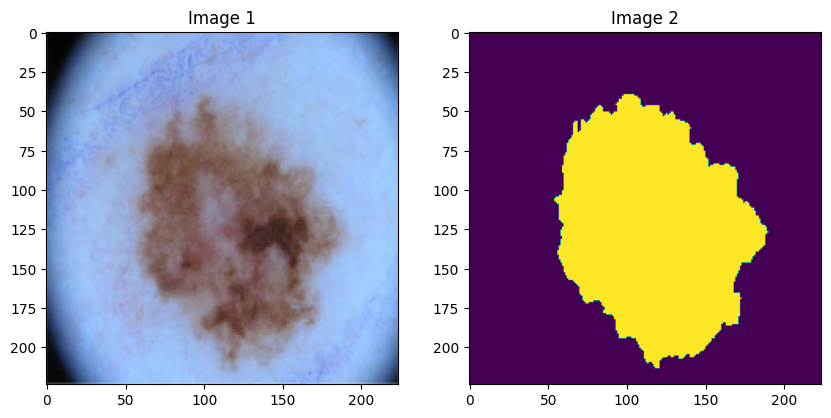

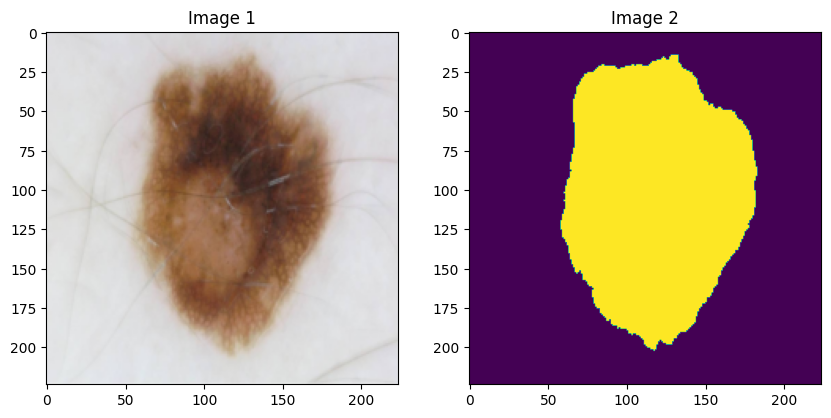

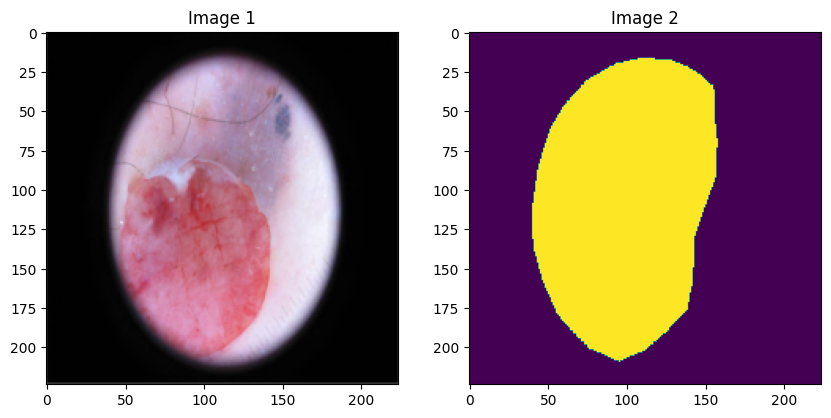

In [4]:

for i, sample in enumerate(train_dataset):
    #print(sample)
    image = sample['image']
    mask = sample['mask']
    # Load your two images

    image = np.array(image)
    mask = np.array(mask)
    #print("image:", image.shape)
    #print(type(image))
    image = np.transpose(image, (1, 2, 0))
    mask = np.transpose(mask, (1, 2, 0))

    # Create a figure with two subplots
    plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

    # Plot the first image in the left subplot
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image 1')

    # Plot the second image in the right subplot
    plt.subplot(1, 2, 2)
    plt.imshow(mask)
    plt.title('Image 2')

    # Show the images
    plt.show()
    if i == 4:
        break
    

In [5]:
model = modules.UNet(3,1,[64,128,256,512]) 
model = model.to(DEVICE)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, 
                            momentum = 0.9, weight_decay = 5e-4)

total_steps = len(train_dataloader)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,max_lr = LEARNING_RATE, 
                               steps_per_epoch = total_steps, epochs = NUM_EPOCHS)
print(total_steps)

model.train()
print("> Training") 
print(enumerate(train_dataloader))
print(train_dataloader)

2000
> Training


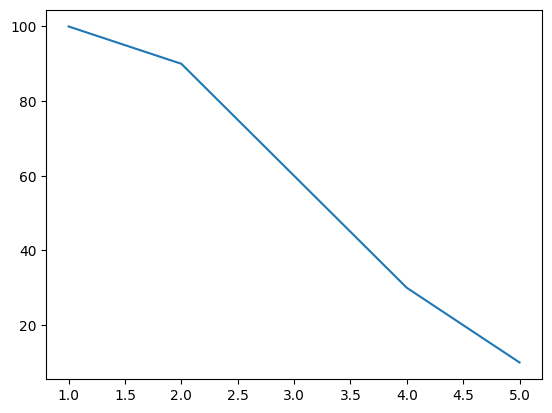

In [6]:
def my_plot(epochs, loss):
    plt.plot(epochs, loss)

my_plot([1, 2, 3, 4, 5], [100, 90, 60, 30, 10])


In [7]:
loss_vals=  []
for epoch in range(NUM_EPOCHS):
    epoch_loss= []
    print("EPOCH:",epoch)
    for i, batch in enumerate(train_dataloader):
        images = batch['image']
        masks = batch['mask']
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)
        outputs = model(images)
        loss = criterion(outputs, masks)
        epoch_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i+1}/{total_steps}], Loss: {loss.item():.5f}')
            utils.save_predictions_as_imgs(train_dataloader,model)
    loss_vals.append(sum(epoch_loss)/len(epoch_loss))
    #my_plot(np.linspace(1, NUM_EPOCHS, NUM_EPOCHS).astype(int), loss_vals)


FILE = "model.pth"
torch.save(model.state_dict(), FILE)

loaded_model = modules.UNet(3,1,[64,128,256,512]) 
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()


print("Training took " +  " secs")
print("> Testing")

    


EPOCH: 0


c:\Users\John\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Epoch [1/5], Step [100/2000], Loss: 0.90608
1 tensor(0.7108, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.7321, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.6859, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.7071, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.6967, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.7455, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.6532, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
2 tensor(1., device='cuda:0')
1 tensor(0.7434, device='cuda:0')
1 tensor(1., device='cuda:0')
2 tensor(1., device='cud

KeyboardInterrupt: 

In [ ]:
loaded_model = train.UNet(3,1,[64,128,256,512]) 
loaded_model.load_state_dict(torch.load(FILE))
loaded_model.eval()
